# A Simple Implementation Of Artificial Neural Network

Some one said the best way to learn is to hack. Since I have started to learn Machine Learning for several months, I decided to do something more interesting, instead of to copy the code from book. Inspired from the following links:

https://iamtrask.github.io/2015/07/27/python-network-part2/

and(specially)

https://medium.com/technology-invention-and-more/how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1

I think maybe it is not a bad idea to implement a simple ANN by myself, with less mathematics and more human understoodable way.

## Make some import and prepare the training data and test data

In [41]:
import numpy as np
X = np.array([
    [0,1,0],
    [0,0,1],
    [1,0,0],
    [1,1,0],
    [0,1,1],
    [1,0,1]
])
y = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]
])

The idea here is simple. Input will be a series of 0 and 1. For each input, if the number of *1* is bigger than *0*,  it will return *1*, else it will return *0*. It is very simple idea and even one layer of ANN can complete the job.

## Define the hypothetical and cost method

The first step is to define the hypothetical method with weights as input. the weights is the measurement for each x element for input X and is also our goal to optimize. The hypothetical method is using sigmoid to do the prediction.

$$h = 1/(1+ e^{-x})$$
A mathimatics question, why sigmoid?

Because it logically simulate the real word when we make the decision. And give enough spread when we are far from making the decision.

In [25]:
def h(weights):
    return 1/(1+np.exp(-X.dot(weights)))

Now it is time to define the cost method. The goal for optimize the weights is to make the return value of cost value as small as possible. 
So far the code is very similar as regular classification. Actually, it is a regular classification.

$$cost=\sum(y' - y)^2$$

In [26]:
def cost(weights):
    return np.sum(np.square(h(weights) - y))

Why square? Mmm... it is just make the difference more obvious.

## Gradient Descend with no math

There are a lot of way to do the gradient decend to get the optima. Some of them are related with mathmatics. For example, for sigmoid prediction, you can use derivative formula:

$$\frac{d\sigma (x)}{d(x)} = \sigma (x)\cdot (1-\sigma(x)).$$

But I am going to try something simpler for the reason:

* there are still a lot of scenarios when a simple formula can't match to get the derivative
* I want to make this artical more interesting

In [27]:
def diff_for_each(weights, index):
    small_value_change = 0.001
    new_weights = np.copy(weights) # this is import, not to change the original weights
    new_weights[index, 0] = new_weights[index, 0] + small_value_change;
    return (cost(new_weights) -  cost(weights))/small_value_change

def diff(weights):
    return np.array([ diff_for_each(weights, index) for index, _ in enumerate(weights)]).reshape(-1,1)

The *diff* method will be used to caculate the difference matrix when one single weight is changed in the weights matrix.

Now we can start to train our single layer ANN network:

In [42]:
steps = 10000
np.random.seed(1)
m, n = X.shape
weights = 2 * np.random.random((4, 1)) - 1
X = np.c_[np.ones((m,1)),X] #add bias

In [43]:
learning_rate = 1
for i in range(steps):
    weights = weights - diff(weights) * learning_rate

And we also need to create a predict method to give the prediction

In [44]:
def predict(X):
    return 1/(1+np.exp(-X.dot(weights)))

First let's cross check our training data

In [45]:
predict(X)

array([[ 0.01019554],
       [ 0.01019554],
       [ 0.01019554],
       [ 0.99116804],
       [ 0.99116804],
       [ 0.99116804]])

It is nice, as for the first three input, the average rate to have output as 1 is 1%, which means the out put is 0 and the last three outputs have 99% chance to be 1!

Let's try some test data
[1,1,1] -> 1
[0,0,0] -> 0

In [48]:
predict(np.array([[1,1,1,1]])) # don't forget the first input will be a bias input and always be 1

array([[ 0.99999918]])

In [49]:
predict(np.array([[1,0,0,0]]))

array([[  9.45432964e-07]])

That is almost the end of the exploring of the single layer ANN. It is working, but not a workable file we can re-use. The following I will wrap this up in a class, do the training and plot the cost history

In [92]:
import numpy as np

class SingleLayerNN():
    def __init__(self, training_steps = 1000, small_diff_value = 0.001, seed = 1, record_cost_history = False, learning_rate = 1):
        self.training_steps = training_steps
        self.small_diff_value =  small_diff_value
        self.seed = seed
        self.learning_rate = learning_rate
        self.record_cost_history = record_cost_history
        self.cost_history = []
            
    def __h(self,X, weights):
        return 1/(1+np.exp(-X.dot(weights)))
    
    def __cost(self,weights):
        return np.sum(np.square(self.__h(self.X_, weights) - y))
    
    def __diff_for_each(self,index):
        new_weights = np.copy(self.weights_) # this is import, not to change the original weights
        new_weights[index, 0] = new_weights[index, 0] + self.small_diff_value
        return (self.__cost(new_weights) -  self.__cost(self.weights_))/self.small_diff_value

    def __diff(self):
        return np.array([ self.__diff_for_each(index) for index, _ in enumerate(self.weights_)]).reshape(-1,1)
    
    def fit(self,X, y):
        m, n = X.shape
        np.random.seed(self.seed)
        self.weights_ = 2 * np.random.random((n+1, 1)) - 1
        self.X_ = np.c_[np.ones((m,1)),X]
        self.y_ = y
        for i in range(self.training_steps):
            self.weights_ = self.weights_ - self.__diff() * self.learning_rate
            if self.record_cost_history:
                self.cost_history.append(self.__cost(self.weights_))
            
    def predict(self,X):
        m, _ = X.shape
        X_to = np.c_[np.ones((m,1)),X]
        return self.__h(X_to, self.weights_)

In [114]:
clf = SingleLayerNN(record_cost_history=True)

In [115]:
X = np.array([
    [0,1,0],
    [0,0,1],
    [1,0,0],
    [1,1,0],
    [0,1,1],
    [1,0,1]
])
y = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]
])

In [116]:
clf.fit(X,y)

In [117]:
clf.predict(X)

array([[ 0.03373278],
       [ 0.03373278],
       [ 0.03373278],
       [ 0.97083048],
       [ 0.97083048],
       [ 0.97083048]])

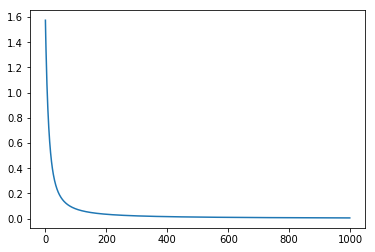

In [118]:
import matplotlib.pyplot as plt
plt.plot(clf.cost_history)
plt.show()

In [119]:
clf.predict(np.array([
    [1,1,1],
    [0,0,0]
]))

array([[  9.99968485e-01],
       [  3.66167486e-05]])